<a href="https://colab.research.google.com/github/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/blob/main/Spaceship_Titanic_Challenge_Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load data from GitHub

train_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/train.csv'
test_data = 'https://raw.githubusercontent.com/KaggleChallenge-Group9/Spaceship-Titanic-Challenge/refs/heads/main/Data/test.csv'

train = pd.read_csv(train_data)
test = pd.read_csv(test_data)

In [4]:
#Print first few rows

train.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


**EDA**

In [5]:
#Overview of dataset

print("Dataset info")
train.info()

print("\n Descriptive statistics")
display(train.describe(include = 'all'))

print("\n Missing values")
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values)

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

 Descriptive statistics


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Ankalik Nateansive,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN



 Missing values
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


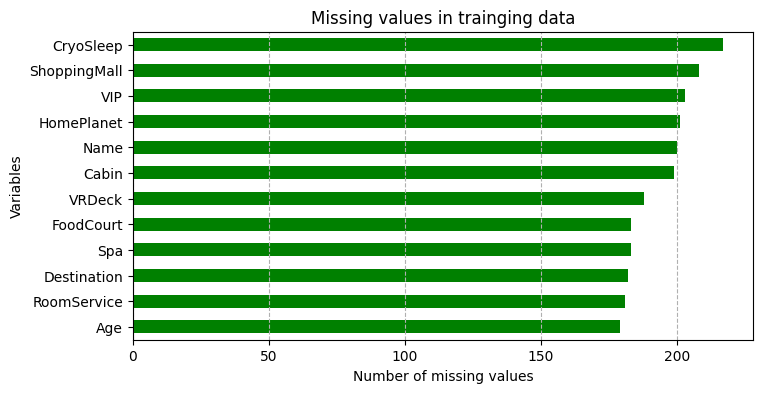

In [6]:
#Visualize the missing values

missing_values = missing_values[missing_values > 0].sort_values(ascending = True)

plt.figure(figsize=(8, 4))
missing_values.plot(kind = 'barh', color ='green')
plt.title("Missing values in trainging data")
plt.xlabel("Number of missing values")
plt.ylabel("Variables")
plt.grid(axis = 'x', linestyle = '--')
plt.show()


Transported
True     4378
False    4315
Name: count, dtype: int64


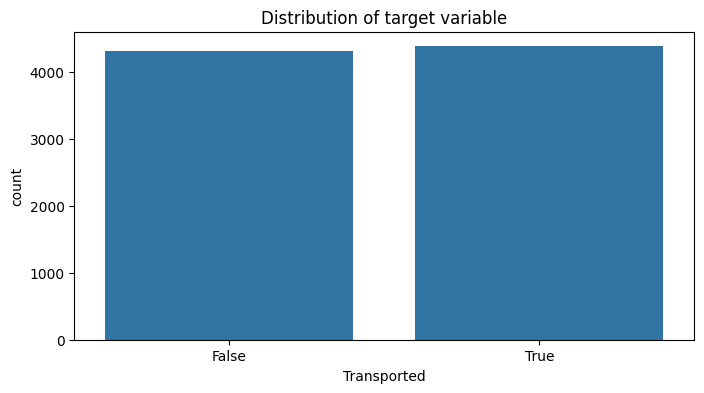

In [7]:
#Target variable distribution
print(train['Transported'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x='Transported', data=train)
plt.title("Distribution of target variable")

plt.show()

/tmp/ipython-input-8-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


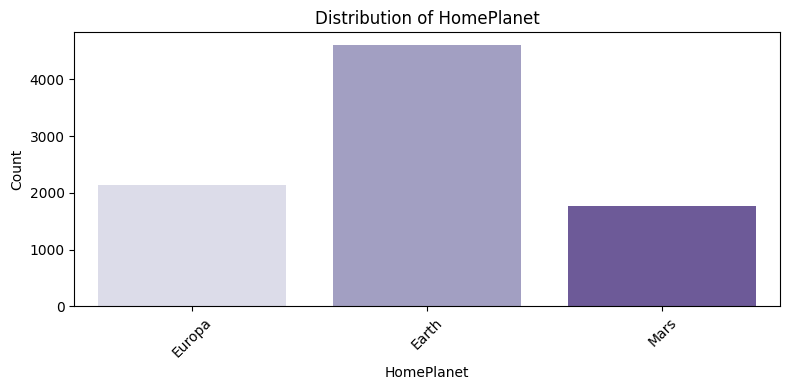

/tmp/ipython-input-8-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


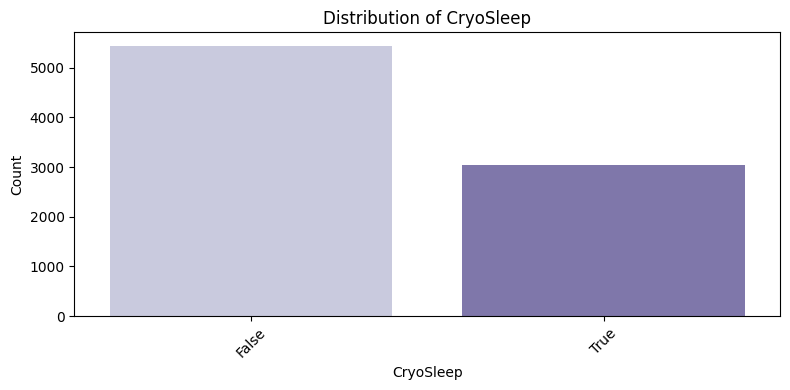

/tmp/ipython-input-8-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


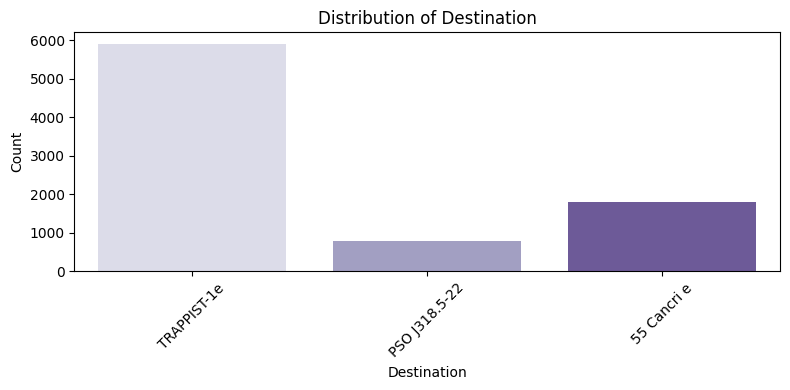

/tmp/ipython-input-8-4053576708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=train, palette='Purples')


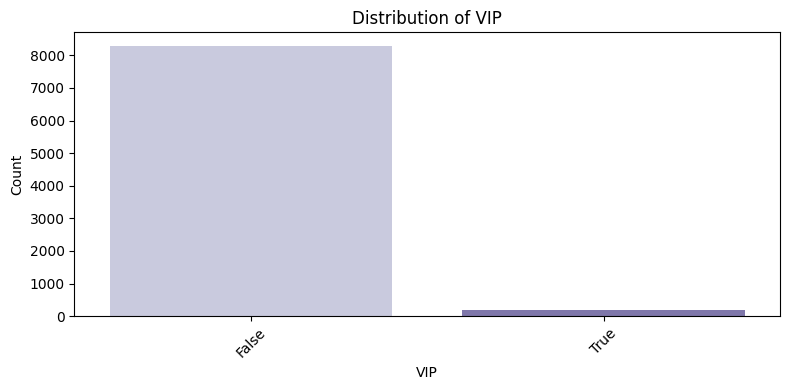

In [8]:
#Distribution of categorical variables "HomePlanet, CryoSleep, Destination, VIP'"

categorical_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for variable in categorical_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=variable, data=train, palette='Purples')
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

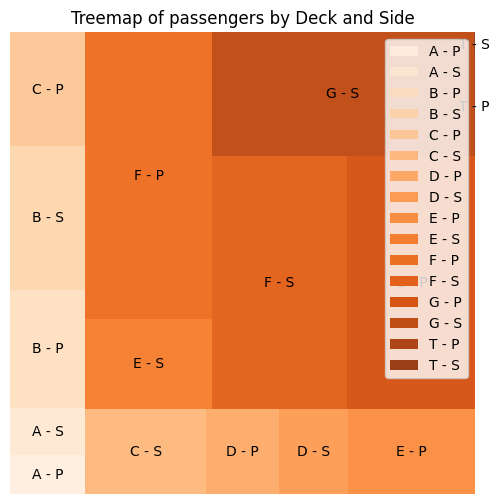

In [12]:
#Split the cabin column
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)

#Group data by deck and dide
deck_side_counts = train.groupby(['Deck', 'Side']).size().reset_index(name='Count')

#Create a labels
deck_side_counts['Label'] = deck_side_counts['Deck'] + ' - ' + deck_side_counts['Side']

#Plot the Treemap
plt.figure(figsize=(6, 6))
squarify.plot(
    sizes=deck_side_counts['Count'],
    label=deck_side_counts['Label'],
    color=sns.color_palette('Oranges', len(deck_side_counts)),
    alpha=0.9
)
plt.title("Treemap of passengers by Deck and Side", fontsize=12)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
num_col = ['RoomService']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='red')[0][0]

ax.set_xlabel("Spending range")
ax.set_ylabel("Number of passengers")
ax.set_title("RoomService spending distribution")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
num_col = ['Spa']
ax = train[num_col].hist(bins=10, figsize=(8,4), color='skyblue')[0][0]

ax.set_xlabel("Cost range")
ax.set_ylabel("Number of passengers")
ax.set_title("Distribution of spa spending")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2, height + 5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
#Age distribution vs transport

plt.figure(figsize=(8, 4))
sns.histplot(data=train, x='Age', hue='Transported', bins=30, kde=True, palette='Set2')
plt.title("Age distribution by transported status")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#Transported Rate by HomePlanet/Cabin Side

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='HomePlanet', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='viridis')
plt.title("Transported rate by HomePlanet")
plt.ylabel("Transported Rate")

plt.subplot(1, 2, 2)
sns.barplot(x='Side', y='Transported', data=train, estimator=lambda x: sum(x)/len(x), palette='plasma')
plt.title("Transported rate by Cabin Side")
plt.ylabel("Transported Rate")

plt.tight_layout()
plt.show()

In [ ]:
train_corr = train.copy()
train_corr['Transported'] = train_corr['Transported'].astype(int)

plt.figure(figsize=(10, 6))
corr_matrix = train_corr[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
#Spending feature correlations

sns.pairplot(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']],
             hue='Transported',
             palette='coolwarm',
             height=1.8,
             plot_kws={'s' : 10})
plt.suptitle("Pairplot of spending features by transported", y=1.02)
plt.tight_layout()
plt.show()


**Pre Processing**

In [ ]:
#Fill numerical with mean

numerical_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numerical_cols:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(test[col].mean())

In [ ]:
#Fill 'Name' with 'Unknown'

train['Name'] = train['Name'].fillna('Unknown')
test['Name'] = test['Name'].fillna('Unknown')

In [ ]:
#Fill categorical missing value with mode

#Variables 'HomePlanet', 'Destination', 'VIP', 'CryoSleep'

cat_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(train[col].mode()[0])

In [ ]:
#Variable 'Cabin'

#Split the into Deck/Num/Side
train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = train['Cabin'].str.split('/', expand=True)
test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = test['Cabin'].str.split('/', expand=True)

#Filling the missing deck and side with mode
train['Cabin_Deck'] = train['Cabin_Deck'].fillna(train['Cabin_Deck'].mode()[0])
test['Cabin_Deck'] = test['Cabin_Deck'].fillna(train['Cabin_Deck'].mode()[0])

train['Cabin_Side'] = train['Cabin_Side'].fillna(train['Cabin_Side'].mode()[0])
test['Cabin_Side'] = test['Cabin_Side'].fillna(train['Cabin_Side'].mode()[0])

print(train[['Cabin', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']].head())

#Cabin_Num is numeric
train['Cabin_Num'] = pd.to_numeric(train['Cabin_Num'], errors='coerce')
test['Cabin_Num'] = pd.to_numeric(test['Cabin_Num'], errors='coerce')

train['Cabin_Num'] = train['Cabin_Num'].fillna(train['Cabin_Num'].mean())
test['Cabin_Num'] = test['Cabin_Num'].fillna(train['Cabin_Num'].mean())


In [ ]:
#Recombined split variables to Cabin

#Make data types string
train['Cabin_Deck'] = train['Cabin_Deck'].astype(str)
train['Cabin_Side'] = train['Cabin_Side'].astype(str)
test['Cabin_Deck'] = test['Cabin_Deck'].astype(str)
test['Cabin_Side'] = test['Cabin_Side'].astype(str)

# Ensure Cabin_Num is numeric, it was already converted to int in the previous cell
train['Cabin_Num'] = train['Cabin_Num'].astype(int)
test['Cabin_Num'] = test['Cabin_Num'].astype(int)


#Recombine to new Cabin column
train['N_Cabin'] = train['Cabin_Deck'] + '/' + train['Cabin_Num'].astype(str) + '/' + train['Cabin_Side']
test['N_Cabin'] = test['Cabin_Deck'] + '/' + test['Cabin_Num'].astype(str) + '/' + test['Cabin_Side']

print(train[['N_Cabin']].head())

#Drop old split columns from train and test if exist

for df in [train, test]:
    for col in ['Deck', 'CabinNum', 'Side']:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

In [ ]:
# Drop the original cabin-related columns from train and test
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [ ]:
###################### remove if unwanted
plt.figure(figsize=(14,5))

#Cabin_Deck count
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Cabin_Deck', palette='Purples')
plt.title('Passenger Count by Cabin Deck')
plt.xlabel('Cabin Deck')
plt.ylabel('Number of Passengers')

#Cabin_Side count
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='Cabin_Side', palette='Purples')
plt.title('Passenger Count by Cabin Side')
plt.xlabel('Cabin Side')
plt.ylabel('Number of Passengers')

plt.tight_layout()
plt.show()

In [ ]:
#Age
#Filled with median since age may skewed

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

In [ ]:
print("\n Missing values - Train \n")
print(train.isnull().sum())

print("\n Missing values - Test \n")
print(test.isnull().sum())

In [ ]:
#Encoding categorical variables

cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                    'Cabin_Deck', 'Cabin_Side']

#Convert categories into numbers using LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

    #Print mapping of codes to original categories
    print(f"Mapping for {col}:")
    for code, category in enumerate(encoder.classes_):
        print(f"  {code} --> {category}")
    print()

#Check first few rows
print("\n Encoded data")
print(train[cat_cols].head())

In [ ]:
#Select target variable and features

target = 'Transported'

#Variables use to predict the target variable
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
            'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']

#Seperate X and y for traiing
X = train[features]
y = train[target].astype(int)

#Select features for test set
X_test = test[features]

#Print training data set shape
print("Shape of training features (X):", X.shape)
print("Shape of target variable (y): \n", y.shape)

#Print first 5 rows of to check data
print("\n First 5 rows of X:")
print(X.head())

#Print distribution of target variable
print("\nTarget variable distribution:")
print(y.value_counts())

##**Model Implementation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


In [ ]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


##Hyper Parametric Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],  # or 'saga' for larger datasets
    'max_iter': [100, 200]
}

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}


In [ ]:
# Logistic Regression
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

In [ ]:
# Random Forest
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

**Random Forest - Train and Model Validation**

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


#Implement Logistic Regression model

In [ ]:
lr=LogisticRegression(C=0.01, max_iter=200, random_state=42)
lr.fit(X,y)
lr_pred=lr.predict(X_val)


print("Validation Accuracy:", accuracy_score(y_val, lr_pred))
print("\nClassification Report:\n", classification_report(y_val, lr_pred))

##Comparing the above models, we got the best accuracy for Random Forest model. So use this model for inference

In [ ]:
best_rf_model = grid_rf.best_estimator_

In [ ]:
y_test_pred = best_rf_model.predict(test[features])

##**Submission File**

In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_test_pred.astype(bool)})

# Display the first few rows of the submission file
print("Submission file preview:")
print(submission.head())

# Save the submission file
submission_path = 'submission.csv'
submission.to_csv(submission_path, index=False)

print(f"\nSubmission file saved successfully at: {submission_path}")